### White Noise

In [25]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

def generate_white_noise_time_series(start_time=pd.Timestamp(datetime.now()),num_points=100, interval='second',rand_seed=142):
    np.random.seed=rand_seed
    start_time=pd.Timestamp(start_time)
    if interval.lower() == 'second' or interval.lower() == 's':
        freq = 'S'
    elif interval.lower() == 'minute' or interval.lower() == 'min':
        freq = 'T'
    elif interval.lower() == 'hour' or interval.lower() == 'h':
        freq = 'H'
    else:
        raise ValueError("Invalid interval specified. Valid options are 'second', 'minute', or 'hour'.")

    time_index = pd.date_range(start=start_time, periods=num_points, freq=freq)
    values = np.random.randn(num_points)
    values =  (values - np.mean(values))/np.std(values)  # Important as the noise may be biased .So to ensure that data is normalised we use this process.

    synthetic_time_series = pd.Series(values, index=time_index)

    return synthetic_time_series


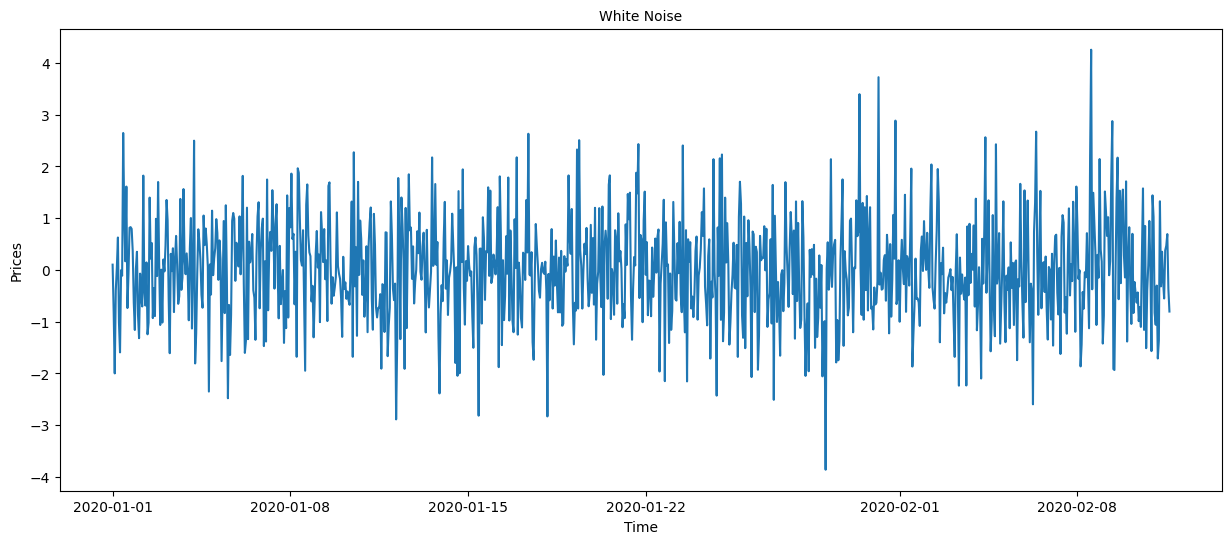

Mean of Time Series Data is 0.0
Standard Deviation of Time Series Data is 1.0


In [55]:
synthetic_data = generate_white_noise_time_series(start_time='2020-01-01',num_points=1000, interval='hour')
plt.figure(figsize=[15,6])
plt.plot(synthetic_data.index, synthetic_data.values)
plt.xlabel("Time")
plt.ylabel('Prices')
plt.title("White Noise",fontdict={'size':10})
plt.show();
print(f"Mean of Time Series Data is {np.mean(synthetic_data.values)}")
print(f"Standard Deviation of Time Series Data is {np.std(synthetic_data.values)}")


### Red Noise 

In [32]:
import numpy as np
import pandas as pd

def generate_red_noise_time_series(start_time=pd.Timestamp(datetime.now()), num_points=100, correlation=0.4, multiplier=100, interval='second',rand_seed=142):
    start_time = pd.Timestamp(start_time)
    np.random.seed=rand_seed
    if interval.lower() == 'second' or interval.lower() == 's':
        freq = 'S'
    elif interval.lower() == 'minute' or interval.lower() == 'min':
        freq = 'T'
    elif interval.lower() == 'hour' or interval.lower() == 'h':
        freq = 'H'
    else:
        raise ValueError("Invalid interval specified. Valid options are 'second', 'minute', or 'hour'.")
    
    time_index = pd.date_range(start=start_time, periods=num_points, freq=freq)

    white_noise = np.random.randn(num_points) * multiplier
    red_noise = np.zeros(num_points)
    for i, r in enumerate(white_noise):
        if i == 0:
            red_noise[i] = r
        else:
            red_noise[i] = correlation * red_noise[i-1] + np.sqrt((1 - np.power(correlation, 2))) * r
    red_noise =  (red_noise - np.mean(red_noise))/np.std(red_noise)
    synthetic_time_series = pd.Series(red_noise, index=time_index)

    return synthetic_time_series

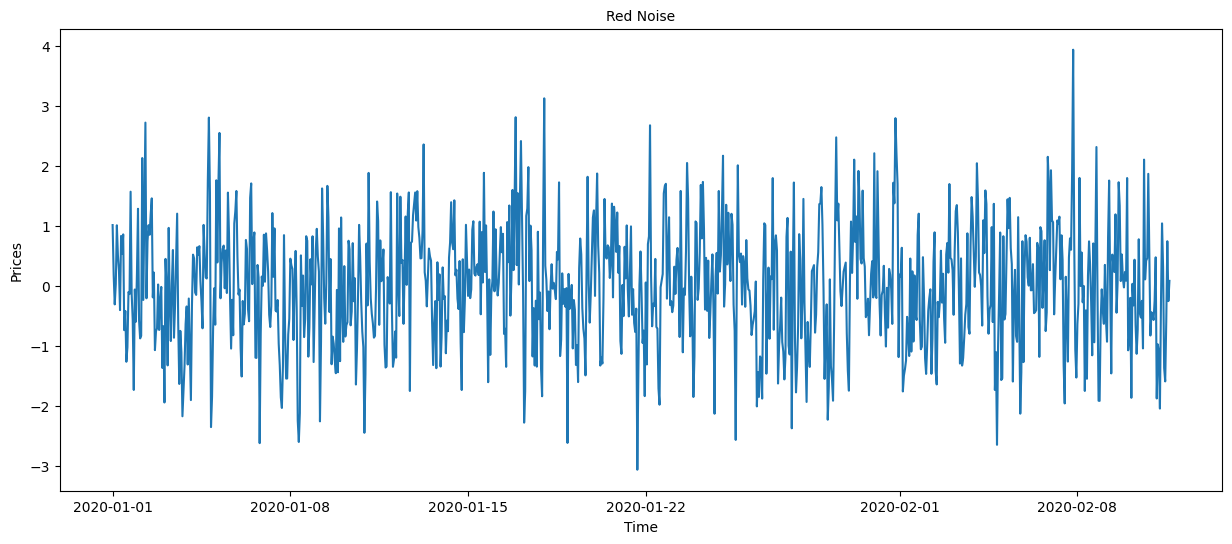

Mean of Time Series Data is 1.3322676295501878e-17
Standard Deviation of Time Series Data is 1.0


In [54]:
synthetic_data = generate_red_noise_time_series(start_time='2020-01-01',num_points=1000, interval='hour')
plt.figure(figsize=[15,6])
plt.plot(synthetic_data.index, synthetic_data.values)
plt.xlabel("Time")
plt.ylabel('Prices')
plt.title("Red Noise",fontdict={'size':10})
plt.show();
print(f"Mean of Time Series Data is {np.mean(synthetic_data.values)}")
print(f"Standard Deviation of Time Series Data is {np.std(synthetic_data.values)}")

### Cyclical Singals 

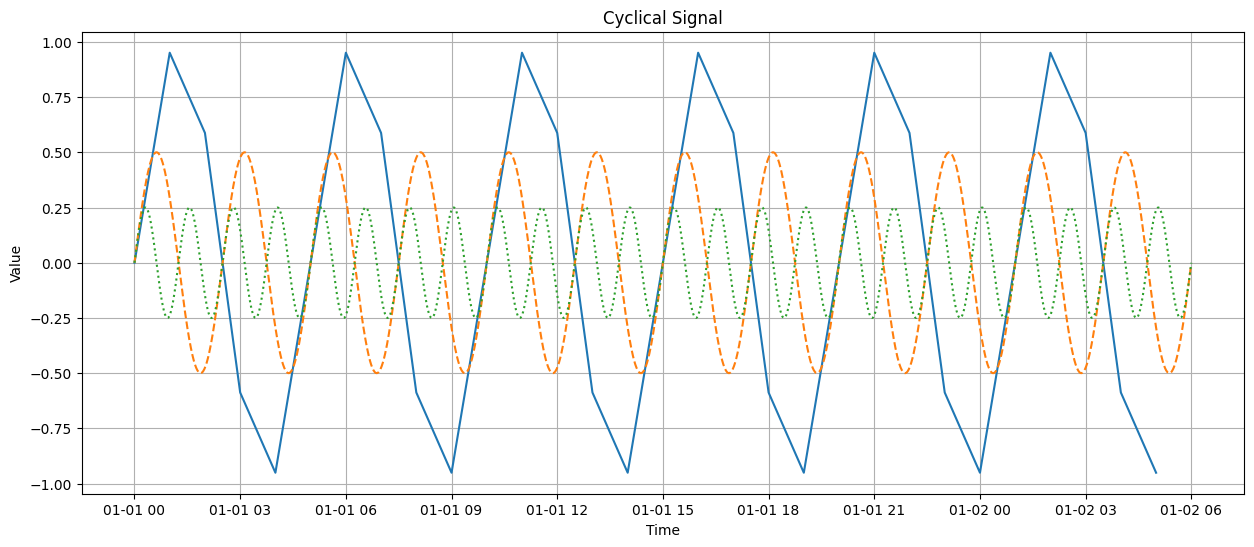

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_cyclical_signal_time_series(start_date, num_points=100, amplitude=1, frequency=1, interval='second'):
    start_date = pd.Timestamp(start_date)
    
    if interval.lower() == 'second' or interval.lower() == 's':
        freq = 'S'
    elif interval.lower() == 'minute' or interval.lower() == 'min':
        freq = 'T'
    elif interval.lower() == 'hour' or interval.lower() == 'h':
        freq = 'H'
    else:
        raise ValueError("Invalid interval specified. Valid options are 'second', 'minute', or 'hour'.")
    
    time_index = pd.date_range(start=start_date, periods=num_points, freq=freq)
    values = amplitude * np.sin(2 * np.pi * frequency * np.arange(num_points) / num_points)
    
    cyclical_signal = pd.Series(values, index=time_index)

    return cyclical_signal


cyclical_signal_1 = generate_cyclical_signal_time_series(start_date = '2023-01-01', num_points = 30, amplitude = 1, frequency = 6, interval = 'hour')
cyclical_signal_2 = generate_cyclical_signal_time_series(start_date = '2023-01-01', num_points = 1800, amplitude = 0.5, frequency = 12, interval = 'minute')
cyclical_signal_3 = generate_cyclical_signal_time_series(start_date = '2023-01-01', num_points = 1800*60, amplitude = 0.25, frequency = 24, interval = 'second')

plt.figure(figsize=[15,6])
plt.plot(cyclical_signal_1)
plt.plot(cyclical_signal_2,linestyle="dashed")
plt.plot(cyclical_signal_3,linestyle="dotted")


plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Cyclical Signal')
plt.grid(True)
plt.show()




### Pseudo-Cyclic Time Series

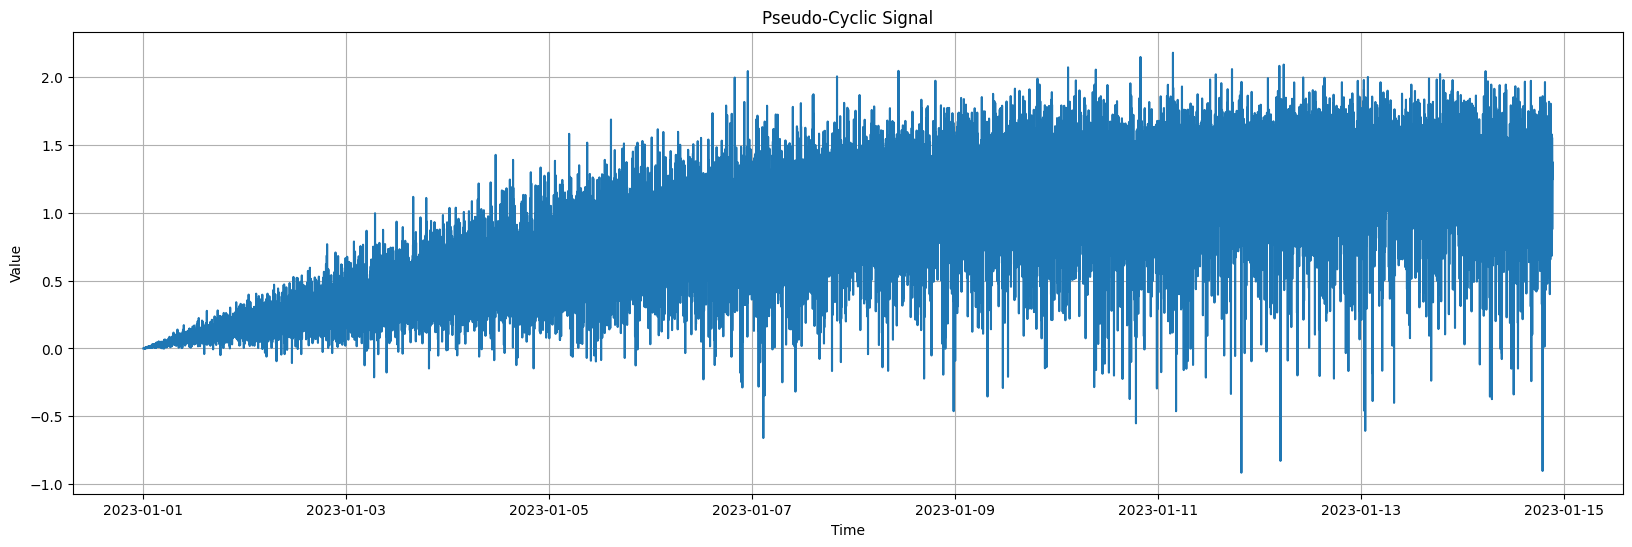

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_pseudo_cyclic_signal(start_date, num_points=100, mean_amplitude=1, std_amplitude=0.2, mean_frequency=1, std_frequency=0.1, interval='second'):
    start_date = pd.Timestamp(start_date)
    
    if interval.lower() == 'second' or interval.lower() == 's':
        freq = 'S'
    elif interval.lower() == 'minute' or interval.lower() == 'min':
        freq = 'T'
    elif interval.lower() == 'hour' or interval.lower() == 'h':
        freq = 'H'
    else:
        raise ValueError("Invalid interval specified. Valid options are 'second', 'minute', or 'hour'.")
    
    time_index = pd.date_range(start=start_date, periods=num_points, freq=freq)
    
    amplitude = np.random.normal(mean_amplitude, std_amplitude, num_points)
    frequency = np.random.normal(mean_frequency, std_frequency, num_points)
    
    values = amplitude * np.sin(2 * np.pi * frequency * np.arange(num_points) / num_points)
    
    pseudo_cyclic_signal = pd.Series(values, index=time_index)

    return pseudo_cyclic_signal

start_date = '2023-01-01'
num_points = 20000
mean_amplitude = 1.5
std_amplitude = 0.2
mean_frequency = 0.25
std_frequency = 0.1
interval = 'minute'

pseudo_cyclic_signal = generate_pseudo_cyclic_signal(start_date, num_points, mean_amplitude, std_amplitude, mean_frequency, std_frequency, interval)
plt.figure(figsize=[20,6])

plt.plot(pseudo_cyclic_signal.index, pseudo_cyclic_signal.values)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Pseudo-Cyclic Signal')
plt.grid(True)
plt.show()


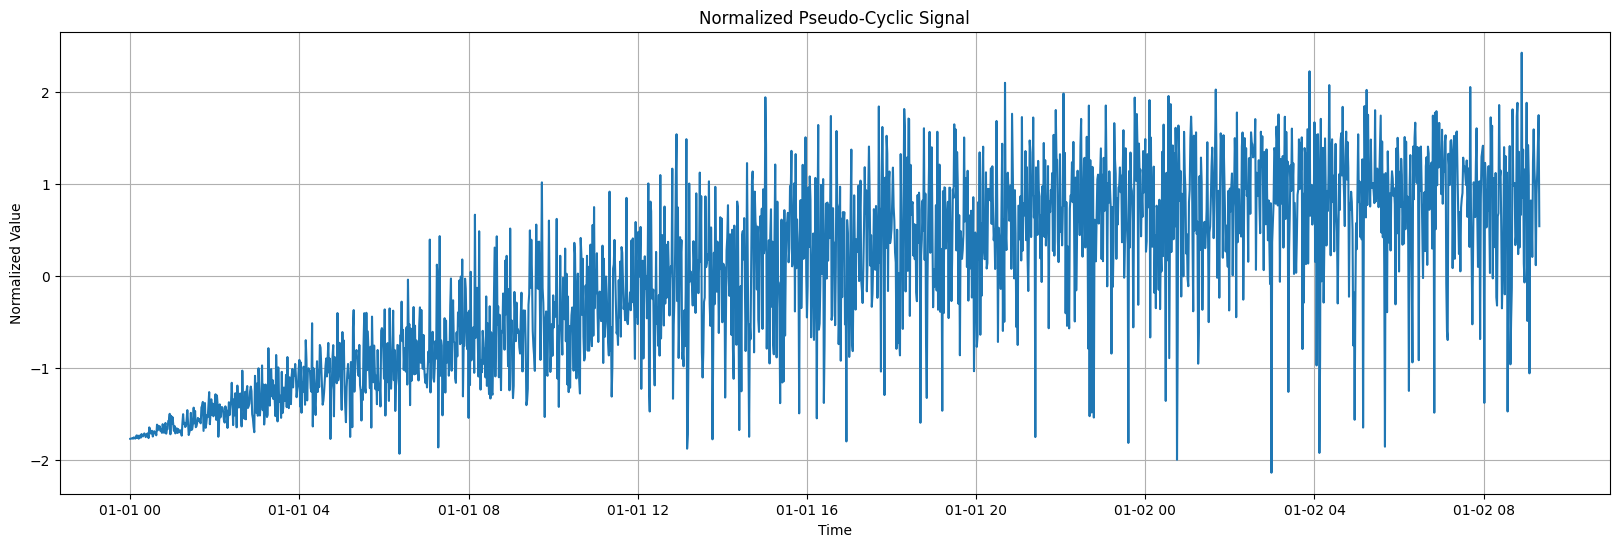

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_pseudo_cyclic_signal(start_date, num_points=100, mean_amplitude=1, std_amplitude=0.2, mean_frequency=1, std_frequency=0.1, interval='second'):
    start_date = pd.Timestamp(start_date)
    
    if interval.lower() == 'second' or interval.lower() == 's':
        freq = 'S'
    elif interval.lower() == 'minute' or interval.lower() == 'min':
        freq = 'T'
    elif interval.lower() == 'hour' or interval.lower() == 'h':
        freq = 'H'
    else:
        raise ValueError("Invalid interval specified. Valid options are 'second', 'minute', or 'hour'.")
    
    time_index = pd.date_range(start=start_date, periods=num_points, freq=freq)
    
    amplitude = np.random.normal(mean_amplitude, std_amplitude, num_points)
    frequency = np.random.normal(mean_frequency, std_frequency, num_points)
    
    values = amplitude * np.sin(2 * np.pi * frequency * np.arange(num_points) / num_points)
    
    normalized_values = (values - np.mean(values)) / np.std(values)
    
    pseudo_cyclic_signal = pd.Series(normalized_values, index=time_index)

    return pseudo_cyclic_signal

start_date = '2023-01-01'
num_points = 2000
mean_amplitude = 1.5
std_amplitude = 0.2
mean_frequency = 0.25
std_frequency = 0.1
interval = 'minute'

pseudo_cyclic_signal = generate_pseudo_cyclic_signal(start_date, num_points, mean_amplitude, std_amplitude, mean_frequency, std_frequency, interval)
plt.figure(figsize=[20,6])

plt.plot(pseudo_cyclic_signal.index, pseudo_cyclic_signal.values)
plt.xlabel('Time')
plt.ylabel('Normalized Value')
plt.title('Normalized Pseudo-Cyclic Signal')
plt.grid(True)
plt.show()


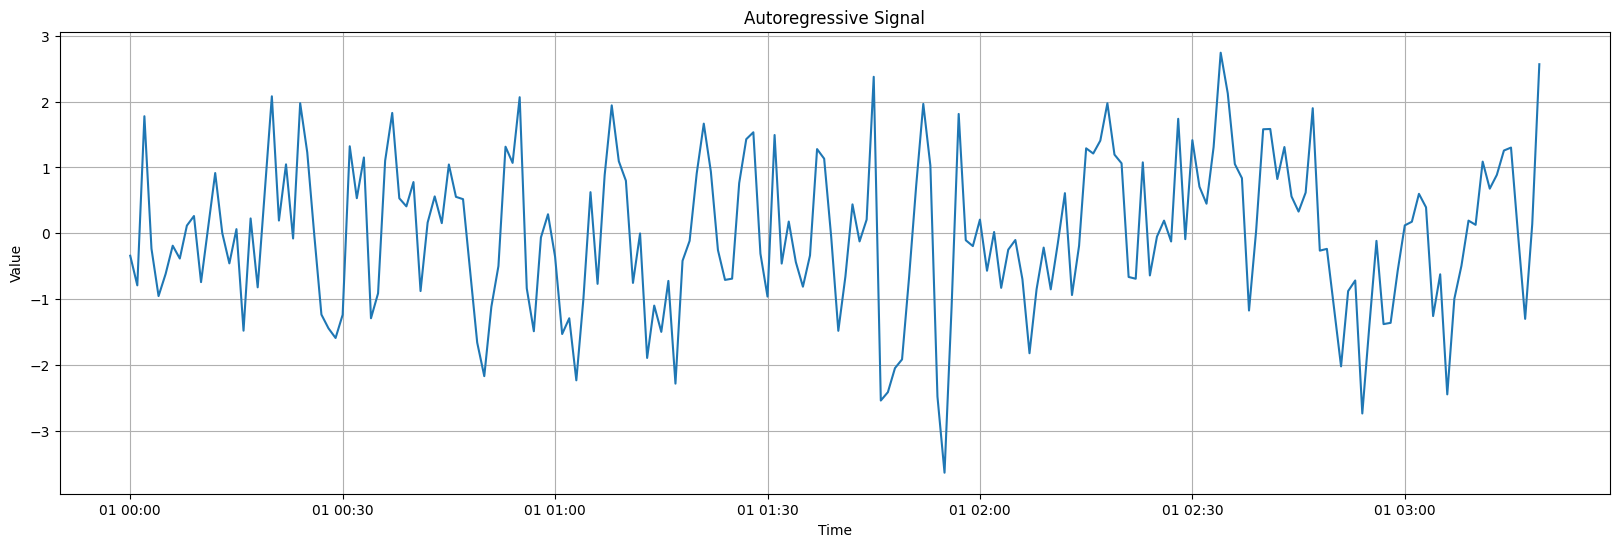

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_autoregressive_signal(start_date, num_points=100, lookback_components=1, ar_parameters=[0.5], mean=0, std=1, interval='second'):
    start_date = pd.Timestamp(start_date)
    
    if interval.lower() == 'second' or interval.lower() == 's':
        freq = 'S'
    elif interval.lower() == 'minute' or interval.lower() == 'min':
        freq = 'T'
    elif interval.lower() == 'hour' or interval.lower() == 'h':
        freq = 'H'
    else:
        raise ValueError("Invalid interval specified. Valid options are 'second', 'minute', or 'hour'.")
    
    time_index = pd.date_range(start=start_date, periods=num_points, freq=freq)
    
    values = np.zeros(num_points)
    values[:lookback_components] = np.random.normal(mean, std, lookback_components)
    
    for i in range(lookback_components, num_points):
        for j in range(lookback_components):
            values[i] += ar_parameters[j] * values[i - (j+1)]
        values[i] += np.random.normal(mean, std)
    
    autoregressive_signal = pd.Series(values, index=time_index)

    return autoregressive_signal

start_date = '2023-01-01'
num_points = 200
lookback_components = 2
ar_parameters = [0.5, -0.2]
mean = 0
std = 1
interval = 'minute'

autoregressive_signal = generate_autoregressive_signal(start_date, num_points, lookback_components, ar_parameters, mean, std, interval)
plt.figure(figsize=[20,6])
plt.plot(autoregressive_signal.index, autoregressive_signal.values)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Autoregressive Signal')
plt.grid(True)
plt.show()


### Moving Average Time Series 

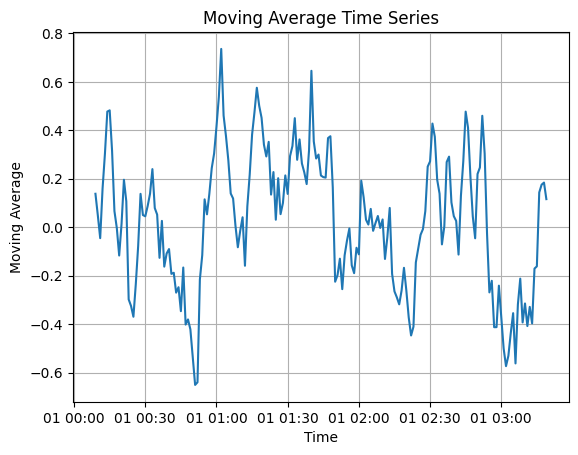

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_moving_average_series(start_date, num_points=100, window_size=5, mean=0, std=1, interval='second'):
    start_date = pd.Timestamp(start_date)
    
    if interval.lower() == 'second' or interval.lower() == 's':
        freq = 'S'
    elif interval.lower() == 'minute' or interval.lower() == 'min':
        freq = 'T'
    elif interval.lower() == 'hour' or interval.lower() == 'h':
        freq = 'H'
    else:
        raise ValueError("Invalid interval specified. Valid options are 'second', 'minute', or 'hour'.")
    
    time_index = pd.date_range(start=start_date, periods=num_points, freq=freq)
    
    values = np.random.normal(mean, std, num_points)
    moving_average_values = np.convolve(values, np.ones(window_size) / window_size, mode='valid')
    
    moving_average_series = pd.Series(moving_average_values, index=time_index[window_size-1:])

    return moving_average_series

start_date = '2023-01-01'
num_points = 200
window_size = 10
mean = 0
std = 1
interval = 'minute'

moving_average_series = generate_moving_average_series(start_date, num_points, window_size, mean, std, interval)
plt.plot(moving_average_series.index, moving_average_series.values)
plt.figure(figsize=[20,6])
plt.xlabel('Time')
plt.ylabel('Moving Average')
plt.title('Moving Average Time Series')
plt.grid(True)
plt.show()

### Combined Time Series = Autoregressive, Moving Average, Pseudo-Cyclic, and Red noise

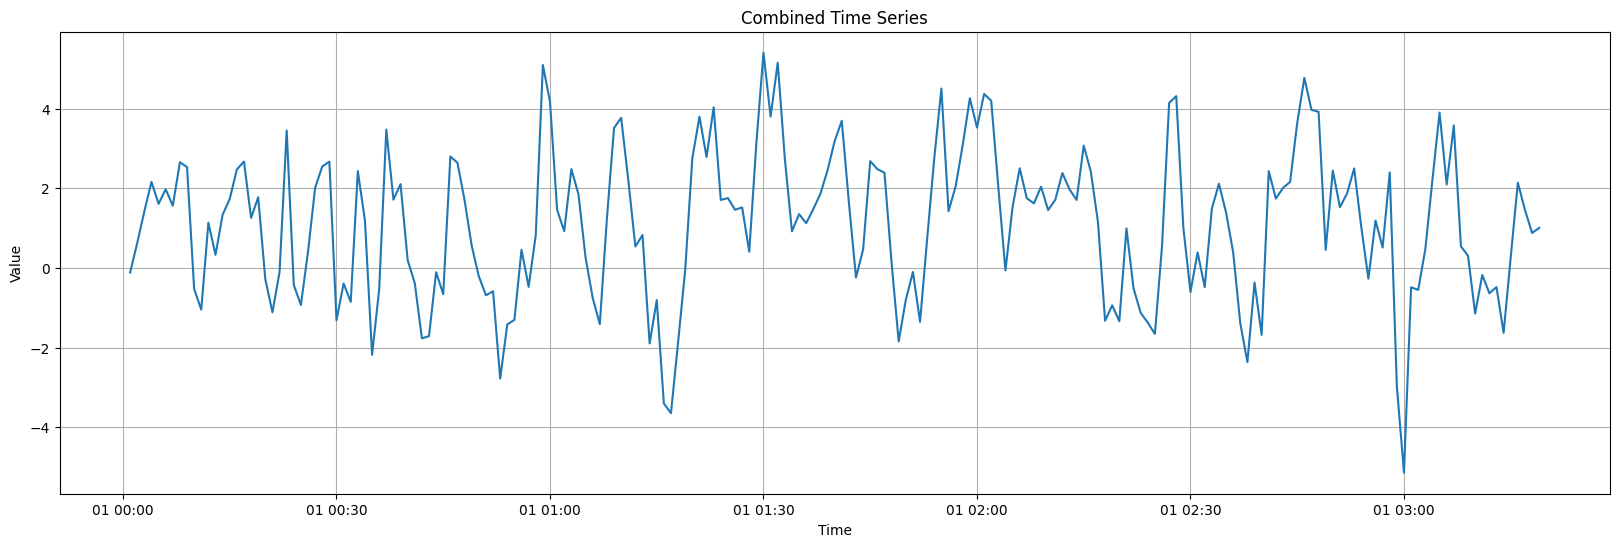

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_combined_time_series(start_date, num_points=100, lookback_components=1, ar_parameters=[0.5], mean=0, std=1, amplitude=1, frequency=1, r=0.4, window_size=5, interval='second'):
    start_date = pd.Timestamp(start_date)
    
    if interval.lower() == 'second' or interval.lower() == 's':
        freq = 'S'
    elif interval.lower() == 'minute' or interval.lower() == 'min':
        freq = 'T'
    elif interval.lower() == 'hour' or interval.lower() == 'h':
        freq = 'H'
    else:
        raise ValueError("Invalid interval specified. Valid options are 'second', 'minute', or 'hour'.")
    
    time_index = pd.date_range(start=start_date, periods=num_points, freq=freq)
    
    # Generate autoregressive component
    ar_values = np.zeros(num_points)
    ar_values[:lookback_components] = np.random.normal(mean, std, lookback_components)
    
    for i in range(lookback_components, num_points):
        for j in range(lookback_components):
            ar_values[i] += ar_parameters[j] * ar_values[i - (j+1)]
        ar_values[i] += np.random.normal(mean, std)
    
    # Generate pseudo-cyclic component
    pseudo_cyclic_values = amplitude * np.sin(2 * np.pi * frequency * np.arange(num_points) / num_points)
    
    # Generate red noise component
    white_noise = np.random.randn(num_points) * std
    red_values = np.zeros(num_points)
    
    for i in range(num_points):
        if i == 0:
            red_values[i] = white_noise[i]
        else:
            red_values[i] = r * red_values[i-1] + np.sqrt(1 - np.power(r, 2)) * white_noise[i]
    
    # Generate moving average component
    moving_average_values = np.convolve(ar_values, np.ones(window_size) / window_size, mode='same')
    moving_average_values = moving_average_values[lookback_components-1:]
    
    combined_values = ar_values[lookback_components-1:] + pseudo_cyclic_values[lookback_components-1:] + red_values[lookback_components-1:] + moving_average_values
    combined_time_series = pd.Series(combined_values, index=time_index[lookback_components-1:])

    return combined_time_series

start_date = '2023-01-01'
num_points = 200
lookback_components = 2
ar_parameters = [0.5, -0.2]
mean = 0
std = 1
amplitude = 1.5
frequency = 0.25
r = 0.4
window_size = 5
interval = 'minute'

combined_time_series = generate_combined_time_series(start_date, num_points, lookback_components, ar_parameters, mean, std, amplitude, frequency, r, window_size, interval)
plt.figure(figsize=[20,6])
plt.plot(combined_time_series.index, combined_time_series.values)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Combined Time Series')
plt.grid(True)
plt.show()
